In [1]:
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'
os.environ["KERAS_BACKEND"] = "tensorflow"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras as kr

data = pd.read_csv('https://query.data.world/s/5tzsx3igwmoqsjgpbseglj24nxib3l?dws=00000', na_values=['?','nan'])
data.drop(columns='Voltage', inplace=True)
data.dropna(inplace=True)
data['Datetime'] = pd.to_datetime(data.pop('Date'), dayfirst=True, format="mixed") + pd.to_timedelta(data.pop('Time'))
data = data.set_index('Datetime')
data.head()

,Global_active_power,Global_reactive_power,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,
2007-01-01 00:00:00,2.580,0.136,10.6,0.0,0.0,0.0
2007-01-01 00:01:00,2.552,0.100,10.4,0.0,0.0,0.0
2007-01-01 00:02:00,2.550,0.100,10.4,0.0,0.0,0.0
2007-01-01 00:03:00,2.550,0.100,10.4,0.0,0.0,0.0
2007-01-01 00:04:00,2.554,0.100,10.4,0.0,0.0,0.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 256869 entries, 2007-01-01 00:00:00 to 2007-06-30 23:59:00
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Global_active_power    256869 non-null  float64
 1   Global_reactive_power  256869 non-null  float64
 2   Global_intensity       256869 non-null  float64
 3   Sub_metering_1         256869 non-null  float64
 4   Sub_metering_2         256869 non-null  float64
 5   Sub_metering_3         256869 non-null  float64
dtypes: float64(6)
memory usage: 13.7 MB


In [3]:
#standardize
DFmean = data.values.mean(axis=0)
DFstd = data.values.std(axis=0)
data = (data.values - DFmean) / DFstd
data = pd.DataFrame(data)
data.head()

,0,1,2,3,4,5
0,1.197349,0.109691,1.125165,-0.198731,-0.251926,-0.712354
1,1.173657,-0.212106,1.085161,-0.198731,-0.251926,-0.712354
2,1.171965,-0.212106,1.085161,-0.198731,-0.251926,-0.712354
3,1.171965,-0.212106,1.085161,-0.198731,-0.251926,-0.712354
4,1.175350,-0.212106,1.085161,-0.198731,-0.251926,-0.712354


In [10]:
trainDF = data.head(201700) #for nice graph
valDF = data.drop(trainDF.index)
x_train = trainDF.values[:-1, :]
y_train = trainDF.values[1:, 0]
x_val = valDF.values[:-1, :]
y_val = valDF.values[1:, 0]

model = kr.Sequential([
    kr.layers.Input(shape=x_train[0].shape),
    kr.layers.Dense(30, activation='relu'),
    kr.layers.Dense(30, activation='relu'),
    kr.layers.Dense(1),
])
model.compile(optimizer=kr.optimizers.Adam(learning_rate=0.0004), loss='mse')
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 30)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,171 (4.57 KB)

 Trainable params: 1,171 (4.57 KB)

 Non-trainable params: 0 (0.00 B)

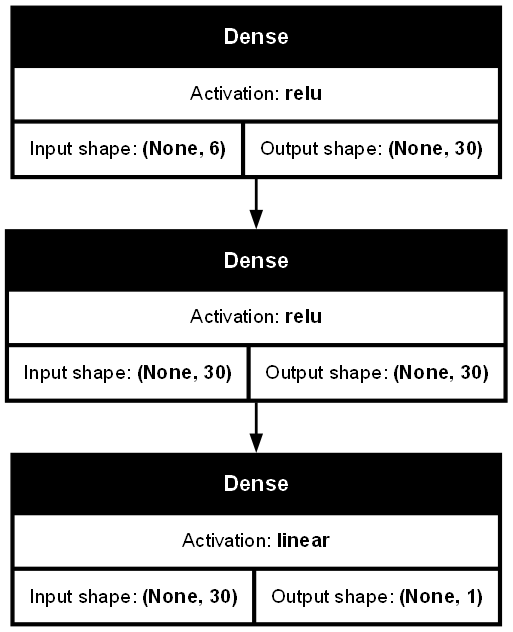

In [11]:
kr.utils.plot_model(model, show_shapes=True, show_layer_activations=True, dpi=100)

In [12]:
history = model.fit(x_train, y_train, batch_size=32, epochs=50, validation_data=(x_val, y_val), verbose=2, shuffle=False)

Epoch 1/50
6304/6304 - 4s - 599us/step - loss: 0.0869 - val_loss: 0.0604
Epoch 2/50
6304/6304 - 3s - 525us/step - loss: 0.0708 - val_loss: 0.0597
Epoch 3/50
6304/6304 - 3s - 523us/step - loss: 0.0703 - val_loss: 0.0598
Epoch 4/50
6304/6304 - 3s - 523us/step - loss: 0.0700 - val_loss: 0.0596
Epoch 5/50
6304/6304 - 3s - 522us/step - loss: 0.0697 - val_loss: 0.0593
Epoch 6/50
6304/6304 - 3s - 517us/step - loss: 0.0694 - val_loss: 0.0591
Epoch 7/50
6304/6304 - 3s - 527us/step - loss: 0.0692 - val_loss: 0.0590
Epoch 8/50
6304/6304 - 3s - 520us/step - loss: 0.0689 - val_loss: 0.0588
Epoch 9/50
6304/6304 - 3s - 513us/step - loss: 0.0687 - val_loss: 0.0586
Epoch 10/50
6304/6304 - 3s - 518us/step - loss: 0.0685 - val_loss: 0.0584
Epoch 11/50
6304/6304 - 3s - 524us/step - loss: 0.0682 - val_loss: 0.0581
Epoch 12/50
6304/6304 - 3s - 519us/step - loss: 0.0680 - val_loss: 0.0579
Epoch 13/50
6304/6304 - 3s - 520us/step - loss: 0.0679 - val_loss: 0.0577
Epoch 14/50
6304/6304 - 3s - 528us/step - loss:

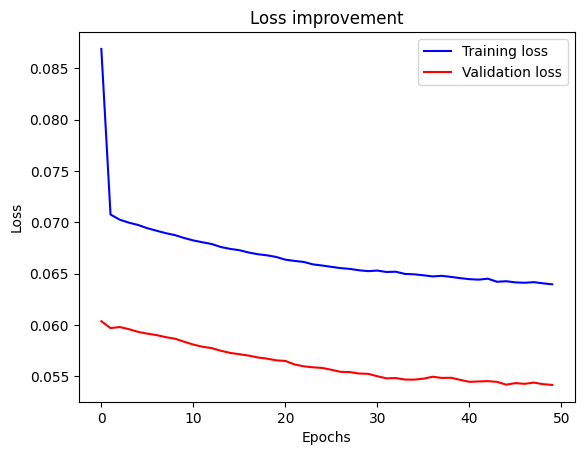

In [13]:
plt.figure()
plt.plot(history.history["loss"], "b", label="Training loss")
plt.plot(history.history["val_loss"], "r", label="Validation loss")
plt.title("Loss improvement")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [14]:
y_pred = model.predict(x_val)

y_pred_inv = x_val.copy()
y_pred_inv[:, 0] = y_pred[:, 0]
y_pred_inv = y_pred_inv * DFstd + DFmean #scaling inverse
y_pred_inv = y_pred_inv[:, 0]

y_val_inv = x_val.copy()
y_val_inv[:, 0] = y_val
y_val_inv = y_val_inv * DFstd + DFmean
y_val_inv = y_val_inv[:, 0]

mape = np.mean(np.abs((y_val_inv - y_pred_inv) / y_val_inv)) * 100
print('Test RMSE: %.3f' % np.sqrt(np.mean(np.square(y_val_inv - y_pred_inv))))
print('Test MAPE: %.3f' % mape)

1724/1724 ━━━━━━━━━━━━━━━━━━━━ 1s 376us/step
Test RMSE: 0.275
Test MAPE: 12.249


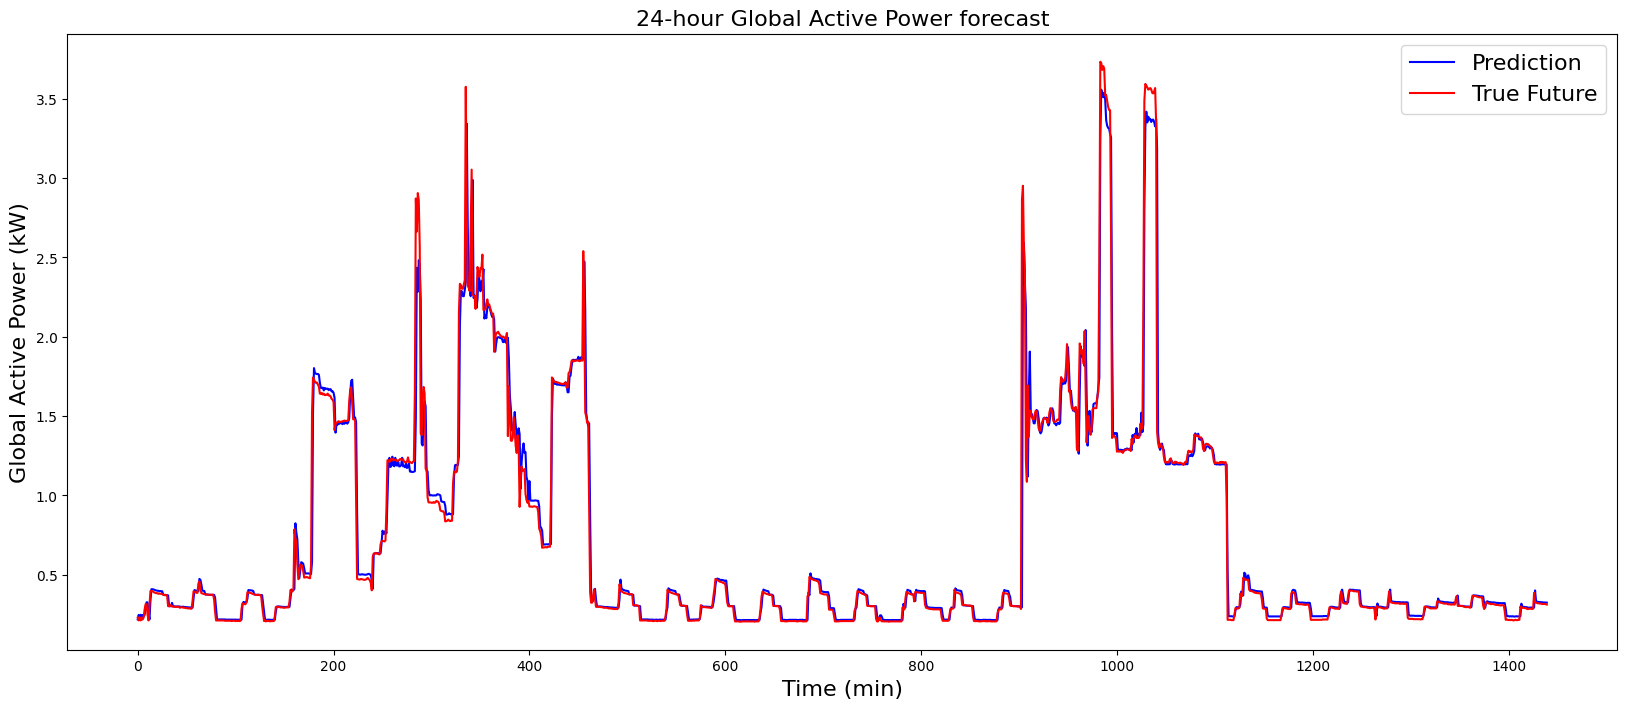

In [15]:
day = 24 * 60
plt.figure(figsize = (20, 8))
plt.plot(y_pred_inv[:day], 'b', label="Prediction",)
plt.plot(y_val_inv[:day], 'r', label="True Future")
plt.title("24-hour Global Active Power forecast", fontsize=16)
plt.xlabel('Time (min)', fontsize=16)
plt.ylabel('Global Active Power (kW)', fontsize=16)
plt.legend(fontsize=16)
plt.show()